<a href="https://colab.research.google.com/github/aishwaryaaa12/Twitter_Sentiment_Analysis_Project/blob/main/Copy_of_Twitter_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

Read dataset

In [ ]:
columns_name= ['twitter ID','entity','sentiment','comment']

In [ ]:
df = pd.read_csv("/content/twitter_training[1].csv",header=None, names=columns_name)

In [ ]:
df.head()

,twitter ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Profile of dataset

In [ ]:
df.shape

(60955, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60955 entries, 0 to 60954
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   twitter ID  60955 non-null  int64 
 1   entity      60955 non-null  object
 2   sentiment   60955 non-null  object
 3   comment     60401 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

twitter ID      0
entity          0
sentiment       0
comment       554
dtype: int64

In [ ]:
df.isna().sum()

twitter ID      0
entity          0
sentiment       0
comment       554
dtype: int64

In [ ]:
df = df.drop(labels= ["twitter ID", "entity"], axis=1)
df.head()

,sentiment,comment
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.sample(10)

,sentiment,comment,stop_words_count,hashtag_count,mention_count,digit_count
30764,Negative,damn just want my 100lp back cant have shit in...,5,0,0,3
14116,Negative,i hate u dota 2,1,0,0,1
20762,Neutral,look at this thing i just got grips of the tri...,6,0,0,0
16573,Irrelevant,pay my car payments instead and i will hold yo...,11,0,0,0
6968,Negative,please dont fuck this up,2,0,0,0
34494,Irrelevant,this guy is fucking cracked holeeee,2,0,0,0
28162,Neutral,think youre still not diamond hard yet,2,0,0,0
35693,Negative,ibm fedex they are not properly,3,0,2,0
24002,Neutral,android becomes the unusable if you turn off a...,7,0,0,2
21158,Negative,,0,0,0,0


In [ ]:
# there are some rows in comment which has very less words , we need to filter out them
# checking for characters
df["comment"].apply(len)# got the length of words in comment

0         52
1         50
2         49
3         50
4         56
        ... 
60950    107
60951    110
60952    131
60953    107
60954    104
Name: comment, Length: 60954, dtype: int64

In [ ]:
df["comment"].apply(len).value_counts()  #lengthwise count, so many comments has word count of one ,which is very less , need to filter

3      1123
69      469
34      442
2       438
42      426
       ... 
418       1
430       1
396       1
356       1
475       1
Name: comment, Length: 373, dtype: int64

In [ ]:
sum(df["comment"].apply(len)>5)   # 58430 comments has char count more than 5

58430

In [ ]:
sum(df["comment"].apply(len)<=5)   # 2524 comments has char count less than 5

2524

In [ ]:
df = df[df["comment"].apply(len)>5]   # filtered data on characters count > 5
df

,sentiment,comment,stop_words_count,hashtag_count,mention_count,digit_count
0,Positive,im getting on borderlands and i will murder yo...,6,0,0,0
1,Positive,i am coming to the borders and i will kill you...,8,0,0,0
2,Positive,im getting on borderlands and i will kill you all,5,0,0,0
3,Positive,im coming on borderlands and i will murder you...,5,0,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,6,0,0,1
...,...,...,...,...,...,...
60950,Irrelevant,whoever vandalizing the speed cameras around t...,7,0,0,0
60951,Irrelevant,whoever is vandalizing the speed cameras aroun...,6,0,0,0
60952,Irrelevant,oh whoever is vandalizing the video speed came...,7,0,0,0
60953,Irrelevant,whoever is mounting the speed cameras around f...,7,0,0,0


In [ ]:
print(df.shape)

(58430, 6)


In [ ]:
df.sample(10)

,sentiment,comment,stop_words_count,hashtag_count,mention_count,digit_count
28210,Negative,playapex asks why has audio not been fixed and...,11,0,1,0
31829,Neutral,check out our video,2,0,0,0
57417,Positive,live hitting the rhandlerr shout out to rh...,5,0,0,0
27327,Negative,ghost of tsushima is a better assassins creed ...,4,0,0,0
29190,Irrelevant,i mean fortnite plans their updates months ahe...,2,0,0,0
53170,Neutral,team live lunch time stream is a go red dead...,2,0,0,1
51392,Neutral,red dead redementation 2 for pc pcmagcom revi...,0,0,0,7
8736,Negative,not me updating overwatch,2,0,0,0
14399,Neutral,at honestly dont remember where twitch chat co...,6,0,1,1
56452,Positive,n rhandlerr i love the now op pictwittercomv2o...,3,0,0,2


In [ ]:
(df["comment"][33825])

'fortnite wtf '

In [ ]:
len(df["comment"][33825])  # len func gives the count of chars in the sent

13

In [ ]:
df["sentiment"].value_counts()

Negative      16945
Positive      16387
Neutral       14031
Irrelevant    11067
Name: sentiment, dtype: int64

<Axes: ylabel='sentiment'>

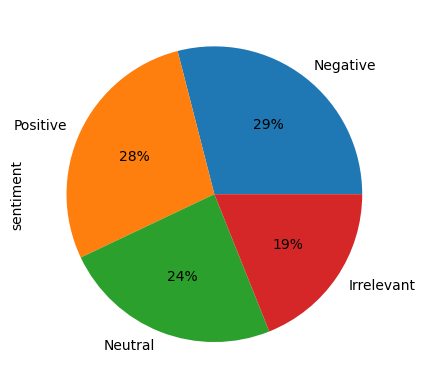

In [ ]:
df["sentiment"].value_counts().plot(kind = "pie", autopct= "%1.0f%%" )

Feature Extraction

In [ ]:
# creating new features
# char len
df["char_len"] = df["comment"].str.len()

In [ ]:
df.columns

Index(['sentiment', 'comment', 'stop_words_count', 'hashtag_count',
       'mention_count', 'digit_count', 'char_len'],
      dtype='object')

In [ ]:
df

,sentiment,comment,stop_words_count,hashtag_count,mention_count,digit_count,char_len
0,Positive,im getting on borderlands and i will murder yo...,6,0,0,0,52
1,Positive,i am coming to the borders and i will kill you...,8,0,0,0,50
2,Positive,im getting on borderlands and i will kill you all,5,0,0,0,49
3,Positive,im coming on borderlands and i will murder you...,5,0,0,0,50
4,Positive,im getting on borderlands 2 and i will murder ...,6,0,0,1,56
...,...,...,...,...,...,...,...
60950,Irrelevant,whoever vandalizing the speed cameras around t...,7,0,0,0,107
60951,Irrelevant,whoever is vandalizing the speed cameras aroun...,6,0,0,0,110
60952,Irrelevant,oh whoever is vandalizing the video speed came...,7,0,0,0,131
60953,Irrelevant,whoever is mounting the speed cameras around f...,7,0,0,0,107


In [ ]:
# words len
df['word_count'] = df['comment'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head(5)

,sentiment,comment,stop_words_count,hashtag_count,mention_count,digit_count,char_len,word_count
0,Positive,im getting on borderlands and i will murder yo...,6,0,0,0,52,10
1,Positive,i am coming to the borders and i will kill you...,8,0,0,0,50,12
2,Positive,im getting on borderlands and i will kill you all,5,0,0,0,49,10
3,Positive,im coming on borderlands and i will murder you...,5,0,0,0,50,10
4,Positive,im getting on borderlands 2 and i will murder ...,6,0,0,1,56,12


In [ ]:
# avg word len
df = df[df['comment'] != '']
x = 0
df['avg_word_length'] = df['comment'].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split())) if x != '' else 0

ZeroDivisionError: ignored

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))
df['stop_words_count'] = df['comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop_words]))

In [ ]:
df

,sentiment,comment,stop_words_count
0,Positive,im getting on borderlands and i will murder yo...,6
1,Positive,I am coming to the borders and I will kill you...,8
2,Positive,im getting on borderlands and i will kill you ...,5
3,Positive,im coming on borderlands and i will murder you...,5
4,Positive,im getting on borderlands 2 and i will murder ...,6
...,...,...,...
60950,Irrelevant,Whoever vandalizing the speed cameras around t...,7
60951,Irrelevant,Whoever is vandalizing the speed cameras aroun...,6
60952,Irrelevant,OH Whoever is vandalizing the video speed came...,7
60953,Irrelevant,Whoever is mounting the speed cameras around f...,7


In [ ]:
def get_stop_words(row):
    comment_words = set(str(row).split())
    return [word for word in comment_words if word.lower() in stop_words]

stop_word = get_stop_words(df['comment'].iloc[0])
stop_word

['you', 'on', 'i', 'will', 'all', 'and']

In [ ]:
# hashtag count and mention count
# Count the number of hashtags in each comment
df['hashtag_count'] = df['comment'].apply(lambda x: str(x).count('#'))
# Count the number of mentions in each comment
df['mention_count'] = df['comment'].apply(lambda x: str(x).count('@'))

In [ ]:
df["hashtag_count"].value_counts()

0      60928
1         23
2          3
198        1
Name: hashtag_count, dtype: int64

In [ ]:
df["hashtag_count"].sort_values(ascending=False)

43712    198
21297      2
5091       2
15153      2
19664      1
        ... 
20331      0
20332      0
20333      0
20334      0
60954      0
Name: hashtag_count, Length: 60955, dtype: int64

In [ ]:
df["comment"][43712]

'# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #'

In [ ]:
df["comment"][54678]

'Whos ready for some zombie royale warzone stream tonight? @GamerRetweets @CallofDuty  . @Pureyo head over to twitch.tv/JustGLN give us a follow and turn notifications on to not miss out on the fun  '

In [ ]:
# Drop the row at index 43712 in place
df.drop(index=43712, inplace=True)

In [ ]:
df.shape

(60954, 5)

In [ ]:
df["mention_count"].value_counts()

0     46626
1     10027
2      2465
3       973
4       426
5       154
6       108
7        47
8        37
9        22
13       16
15       11
11       10
10        9
12        5
14        5
17        5
16        5
26        1
25        1
31        1
Name: mention_count, dtype: int64

In [ ]:
df["comment"][21638]

'@ YouTubeCreators. @ YouTubeCreators. @ CarryMinati. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming. @ YouTubeGaming.'

In [ ]:
df

,sentiment,comment,stop_words_count,hashtag_count,mention_count
0,Positive,im getting on borderlands and i will murder yo...,6,0,0
1,Positive,I am coming to the borders and I will kill you...,8,0,0
2,Positive,im getting on borderlands and i will kill you ...,5,0,0
3,Positive,im coming on borderlands and i will murder you...,5,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,6,0,0
...,...,...,...,...,...
60950,Irrelevant,Whoever vandalizing the speed cameras around t...,7,0,0
60951,Irrelevant,Whoever is vandalizing the speed cameras aroun...,6,0,0
60952,Irrelevant,OH Whoever is vandalizing the video speed came...,7,0,0
60953,Irrelevant,Whoever is mounting the speed cameras around f...,7,0,0


In [ ]:
# Count the number of digits in each comment
df['digit_count'] = df['comment'].apply(lambda x: sum(char.isdigit() for char in str(x)))

In [ ]:
df["digit_count"].sort_values(ascending= False)

21112    80
21108    74
21111    73
21110    72
21113    71
         ..
26853     0
26854     0
26855     0
26856     0
60954     0
Name: digit_count, Length: 60954, dtype: int64

In [ ]:
df["comment"][54632]

'Somehow I was taught to play duty lol.'

plot the num features write sentiment

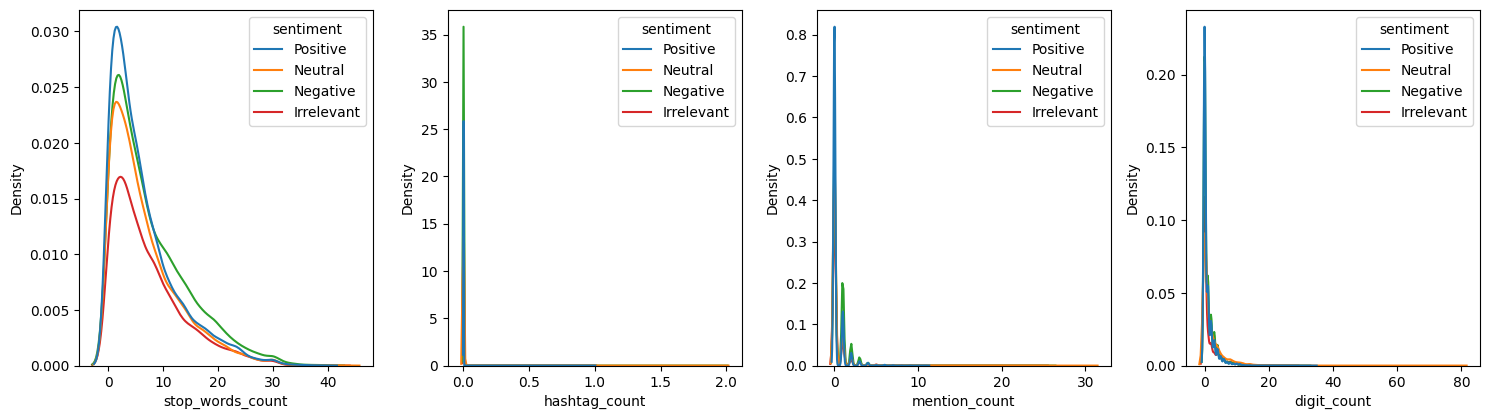

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
num_cols = df.select_dtypes(include= "number").columns

for index , col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data= df, x= col, hue= "sentiment", fill= False)

plt.tight_layout()
plt.show()

World Cloud Visualization

In [ ]:
from wordcloud import WordCloud , STOPWORDS

stopwords = set(STOPWORDS)

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
wordcloud = WordCloud( background_color="white", stopwords= stopwords,
                      max_words= 300,max_font_size=40, scale= 5).generate(str(df["comment"]))


Data Cleaning

In [ ]:
import re
import string
from bs4 import BeautifulSoup

In [ ]:
# lower casing
df["comment"]= df["comment"].str.lower()

In [ ]:
# remove url

df["comment"] = df["comment"].astype(str)

df["comment"] = df["comment"].apply(lambda x: re.sub(r'http\S+', '', x))

In [ ]:
# remove html tags
df["comment"] = df["comment"].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

In [ ]:
# remove punctuations
df["comment"] = df["comment"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

In [ ]:
# remove special chars
df["comment"] = df["comment"].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

In [ ]:

# remove emogis
!pip install emoji

import emoji

df["comment"] = df["comment"].apply(lambda x: emoji.demojize(x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 3.2 MB/s eta 0:00:00


In [ ]:

df["comment"]

0        im getting on borderlands and i will murder yo...
1        i am coming to the borders and i will kill you...
2        im getting on borderlands and i will kill you all
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
60950    whoever vandalizing the speed cameras around t...
60951    whoever is vandalizing the speed cameras aroun...
60952    oh whoever is vandalizing the video speed came...
60953    whoever is mounting the speed cameras around f...
60954    the first one looks like the shit you see in h...
Name: comment, Length: 60954, dtype: object

Model Building and Testing

Train Test split

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(df["comment"],df["sentiment"],test_size=0.2,random_state=21)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [ ]:
stop_words= list(stopwords.words('english'))

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df["comment"], df["sentiment"], test_size= 0.2, random_state=42)

In [ ]:
x_train.shape

(48763,)

In [ ]:
x_test.shape

(12191,)

In [ ]:
clf = Pipeline([("tfidf", TfidfVectorizer(stop_words='english')),
                ("rfc", RandomForestClassifier())])

In [ ]:
# Fit the model
clf.fit(xtrain,ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('rfc', RandomForestClassifier())])

In [ ]:
# evaluation
from sklearn.metrics import classification_report

In [ ]:
y_pred = clf.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.95      0.85      0.90      2233
    Negative       0.92      0.91      0.92      3616
     Neutral       0.89      0.87      0.88      2881
    Positive       0.85      0.93      0.89      3461

    accuracy                           0.90     12191
   macro avg       0.90      0.89      0.90     12191
weighted avg       0.90      0.90      0.90     12191



Model has achieved very good accuracy